In [117]:
#Import the required libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pyramid as pm
from pyramid.arima import auto_arima

In [118]:
#Load the data
data = pd.read_csv('C:/Users/pondh/Desktop/REVA/BA03-TRIM03-Module13(FinancialAnalytics)/CaseStudy/Data2.csv')

In [119]:
data.head()
data.tail()

,Date,NetSales-Product,Net-SalesService,Total net sales,CostofSales-Product,CostofSales-Service,Total cost of sales,GROSS MARGIN,OpExp-Research and development,OpExp-Sales and marketing,...,OpExp-Restructuring and other charges,OpExp-Total operating expenses,OPERATING INCOME,Interest income,Interest expense,"Other income, net","Interest and other income, net",INCOME BEFORE PROVISION FOR INCOME TAXES,Provision for income taxes,NET INCOME
0,24-10-2009,7200.0,1821.0,9021.0,2486.0,647.0,3133.0,5888.0,1224.0,2010.0,...,NaN,3764.0,2124.0,168.0,-114.0,61.0,115.0,2239.0,452.0,1787.0
1,23-01-2010,7976.0,1839.0,9815.0,2815.0,668.0,3483.0,6332.0,1247.0,2126.0,...,NaN,3962.0,2370.0,155.0,-158.0,-12.0,-15.0,2355.0,502.0,1853.0
2,01-05-2010,8436.0,1932.0,10368.0,3010.0,728.0,3738.0,6630.0,1411.0,2278.0,...,NaN,4285.0,2345.0,158.0,-182.0,82.0,58.0,2403.0,211.0,2192.0
3,31-07-2010,8808.0,2028.0,10836.0,3309.0,734.0,4043.0,6793.0,1391.0,2368.0,...,NaN,4468.0,2325.0,154.0,-169.0,108.0,93.0,2418.0,483.0,1935.0
4,30-10-2010,8700.0,2050.0,10750.0,3249.0,746.0,3995.0,6755.0,1431.0,2402.0,...,NaN,4404.0,2351.0,160.0,-166.0,80.0,74.0,2425.0,495.0,1930.0


,Date,NetSales-Product,Net-SalesService,Total net sales,CostofSales-Product,CostofSales-Service,Total cost of sales,GROSS MARGIN,OpExp-Research and development,OpExp-Sales and marketing,...,OpExp-Restructuring and other charges,OpExp-Total operating expenses,OPERATING INCOME,Interest income,Interest expense,"Other income, net","Interest and other income, net",INCOME BEFORE PROVISION FOR INCOME TAXES,Provision for income taxes,NET INCOME
21,24-01-2015,9078.0,2858.0,11936.0,3806.0,1040.0,4846.0,7090.0,1529.0,2308.0,...,69.00,4468.0,2622.0,189.0,-139.0,201.0,251.0,2873.0,476.0,2397.0
22,25-04-2015,9326.0,2811.0,12137.0,3584.0,1028.0,4612.0,7525.0,1547.0,2449.0,...,24.00,4600.0,2925.0,190.0,-139.0,59.0,110.0,3035.0,598.0,2437.0
23,25-07-2015,9911.0,2932.0,12843.0,4068.0,1042.0,5110.0,7733.0,1548.0,2549.0,...,73.00,4852.0,2881.0,211.0,-149.0,-10.0,52.0,2933.0,614.0,2319.0
24,24-10-2015,9844.0,2838.0,12682.0,3853.0,997.0,4850.0,7832.0,1560.0,2443.0,...,142.00,4753.0,3079.0,225.0,-159.0,-8.0,58.0,3137.0,707.0,2430.0
25,23-01-2016,8983.0,2944.0,11927.0,3480.0,1015.0,4495.0,7432.0,1509.0,2286.0,...,96.00,4138.0,3294.0,237.0,-162.0,-63.0,12.0,3306.0,159.0,3147.0


In [120]:
data.shape

(26, 22)

In [121]:
data.dtypes

Date                                                  object
NetSales-Product                                     float64
Net-SalesService                                     float64
Total net sales                                      float64
CostofSales-Product                                  float64
CostofSales-Service                                  float64
Total cost of sales                                  float64
GROSS MARGIN                                         float64
OpExp-Research and development                       float64
OpExp-Sales and marketing                            float64
OpExp-General and administrative                     float64
OpExp-Amortization of purchased intangible assets    float64
OpExp-Restructuring and other charges                 object
OpExp-Total operating expenses                       float64
OPERATING INCOME                                     float64
Interest income                                      float64
Interest expense        

In [122]:
data['Date2'] = pd.to_datetime(data['Date'])

In [123]:
data.head()

,Date,NetSales-Product,Net-SalesService,Total net sales,CostofSales-Product,CostofSales-Service,Total cost of sales,GROSS MARGIN,OpExp-Research and development,OpExp-Sales and marketing,...,OpExp-Total operating expenses,OPERATING INCOME,Interest income,Interest expense,"Other income, net","Interest and other income, net",INCOME BEFORE PROVISION FOR INCOME TAXES,Provision for income taxes,NET INCOME,Date2
0,24-10-2009,7200.0,1821.0,9021.0,2486.0,647.0,3133.0,5888.0,1224.0,2010.0,...,3764.0,2124.0,168.0,-114.0,61.0,115.0,2239.0,452.0,1787.0,2009-10-24
1,23-01-2010,7976.0,1839.0,9815.0,2815.0,668.0,3483.0,6332.0,1247.0,2126.0,...,3962.0,2370.0,155.0,-158.0,-12.0,-15.0,2355.0,502.0,1853.0,2010-01-23
2,01-05-2010,8436.0,1932.0,10368.0,3010.0,728.0,3738.0,6630.0,1411.0,2278.0,...,4285.0,2345.0,158.0,-182.0,82.0,58.0,2403.0,211.0,2192.0,2010-01-05
3,31-07-2010,8808.0,2028.0,10836.0,3309.0,734.0,4043.0,6793.0,1391.0,2368.0,...,4468.0,2325.0,154.0,-169.0,108.0,93.0,2418.0,483.0,1935.0,2010-07-31
4,30-10-2010,8700.0,2050.0,10750.0,3249.0,746.0,3995.0,6755.0,1431.0,2402.0,...,4404.0,2351.0,160.0,-166.0,80.0,74.0,2425.0,495.0,1930.0,2010-10-30


In [124]:
data.dtypes

Date                                                         object
NetSales-Product                                            float64
Net-SalesService                                            float64
Total net sales                                             float64
CostofSales-Product                                         float64
CostofSales-Service                                         float64
Total cost of sales                                         float64
GROSS MARGIN                                                float64
OpExp-Research and development                              float64
OpExp-Sales and marketing                                   float64
OpExp-General and administrative                            float64
OpExp-Amortization of purchased intangible assets           float64
OpExp-Restructuring and other charges                        object
OpExp-Total operating expenses                              float64
OPERATING INCOME                                

In [125]:
data['OpExp-Restructuring and other charges'] = pd.to_numeric(data['OpExp-Restructuring and other charges'], errors = 'coerce')

In [126]:
data.dtypes

Date                                                         object
NetSales-Product                                            float64
Net-SalesService                                            float64
Total net sales                                             float64
CostofSales-Product                                         float64
CostofSales-Service                                         float64
Total cost of sales                                         float64
GROSS MARGIN                                                float64
OpExp-Research and development                              float64
OpExp-Sales and marketing                                   float64
OpExp-General and administrative                            float64
OpExp-Amortization of purchased intangible assets           float64
OpExp-Restructuring and other charges                       float64
OpExp-Total operating expenses                              float64
OPERATING INCOME                                

In [127]:
data = data.drop(['Date'], axis=1)

(array([1., 0., 1., 1., 2., 4., 4., 5., 5., 3.]),
 array([7200. , 7471.1, 7742.2, 8013.3, 8284.4, 8555.5, 8826.6, 9097.7,
        9368.8, 9639.9, 9911. ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Histogram of NetSales-Product')

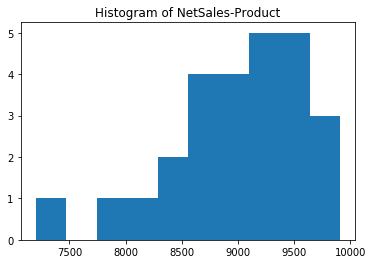

In [160]:
plt.hist(data['NetSales-Product'])
plt.title('Histogram of NetSales-Product')
plt.show()

Text(0.5,0,'Quarter Ending Dates')

Text(0,0.5,'Net Sales - Product')

Text(0.5,1,'Line Chart of Net Sales - Product')

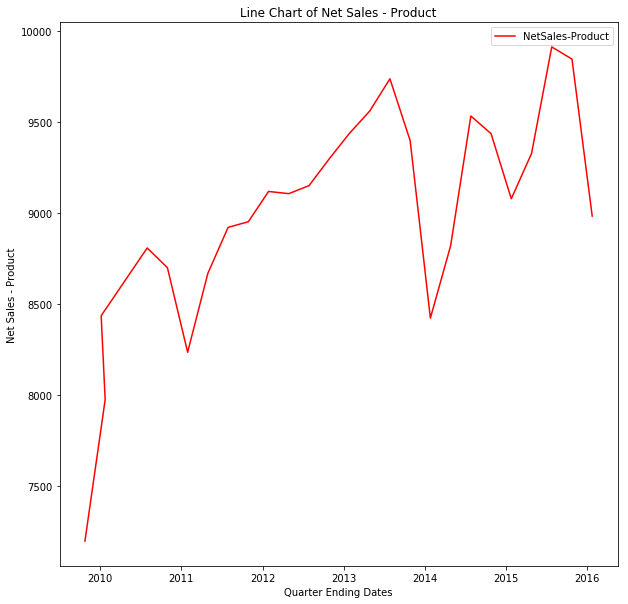

In [128]:
#Data Exploration
plt.figure(figsize=(10,10))
plt.plot(data['Date2'], data['NetSales-Product'], color='r')
plt.xlabel('Quarter Ending Dates')
plt.ylabel('Net Sales - Product')
plt.title('Line Chart of Net Sales - Product')
plt.legend()

In [139]:
decomposition_NetSalesProduct1 = seasonal_decompose(data2['NetSales-Product'], model = 'multiplicative')
decomposition_NetSalesProduct2 = seasonal_decompose(data2['NetSales-Product'], model = 'additive')

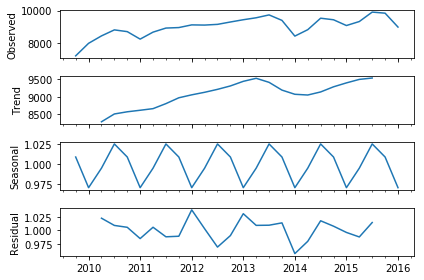

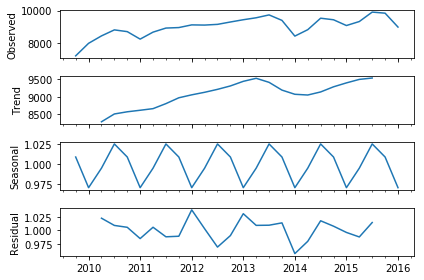

In [149]:
decomposition_NetSalesProduct1.plot()
plt.show()

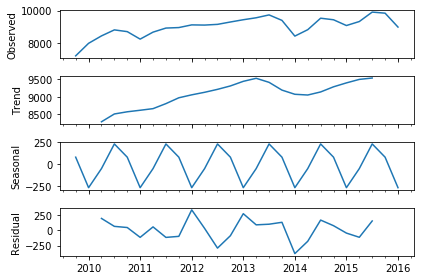

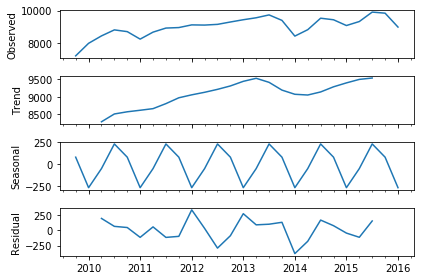

In [141]:
decomposition_NetSalesProduct2.plot()
plt.show()

Text(0.5,0,'Quarter Ending Dates')

Text(0,0.5,'Net Sales - Product & Net Income')

Text(0.5,1,'Line Chart of Net Sales - Product & Net Income')

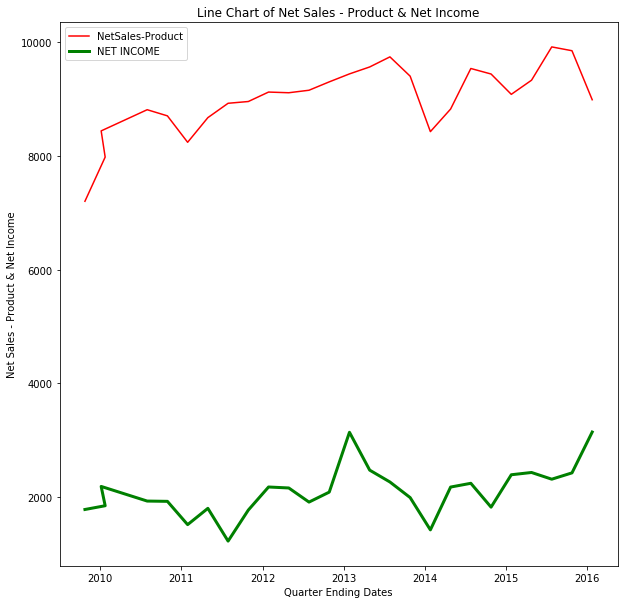

In [81]:
#Data Exploration
plt.figure(figsize=(10,10))
plt.plot(data['Date2'], data['NetSales-Product'], color='r')
plt.plot(data['Date2'], data['NET INCOME'], color='g', linewidth = 3)
plt.xlabel('Quarter Ending Dates')
plt.ylabel('Net Sales - Product & Net Income')
plt.title('Line Chart of Net Sales - Product & Net Income')
plt.legend()

(array([3., 1., 1., 2., 2., 2., 2., 4., 5., 4.]),
 array([1821. , 1933.3, 2045.6, 2157.9, 2270.2, 2382.5, 2494.8, 2607.1,
        2719.4, 2831.7, 2944. ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Histogram of Net-SalesService')

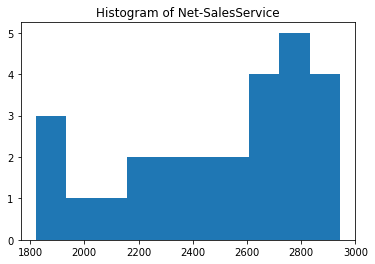

In [159]:
plt.hist(data['Net-SalesService'])
plt.title('Histogram of Net-SalesService')
plt.show()

Text(0.5,0,'Quarter Ending Dates')

Text(0,0.5,'Net Sales - Service')

Text(0.5,1,'Line Chart of Net Sales - Service')

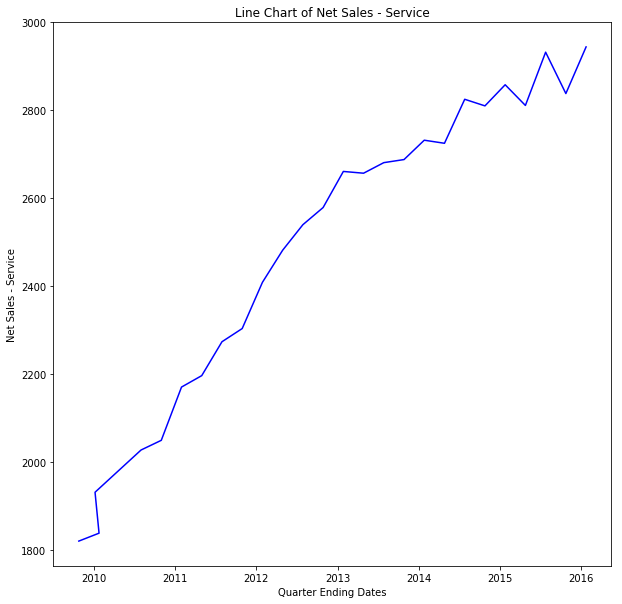

In [14]:
plt.figure(figsize=(10,10))
plt.plot(data['Date2'], data['Net-SalesService'], color='b')
plt.xlabel('Quarter Ending Dates')
plt.ylabel('Net Sales - Service')
plt.title('Line Chart of Net Sales - Service')

In [142]:
decomposition_NetSalesService1 = seasonal_decompose(data2['Net-SalesService'], model = 'multiplicative')
decomposition_NetSalesService2 = seasonal_decompose(data2['Net-SalesService'], model = 'additive')

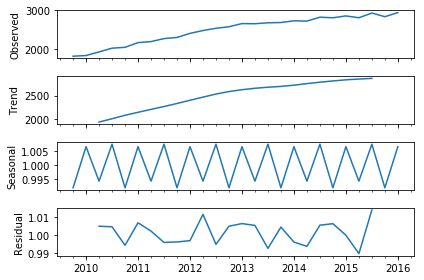

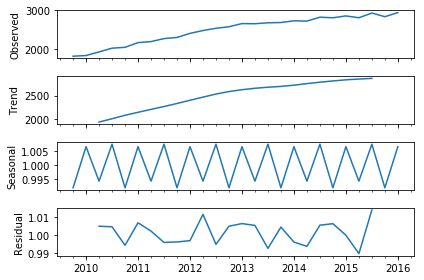

In [147]:
decomposition_NetSalesService1.plot()
plt.show()

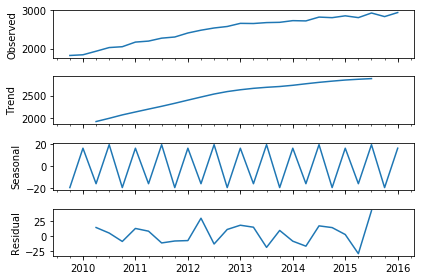

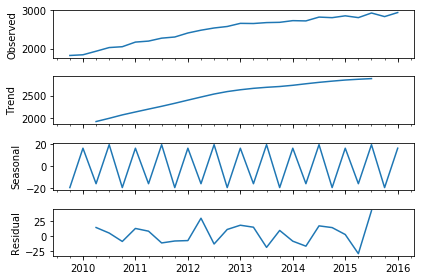

In [144]:
decomposition_NetSalesService2.plot()
plt.show()

Text(0.5,0,'Quarter Ending Dates')

Text(0,0.5,'Net Sales - Service & Net Income')

Text(0.5,1,'Line Chart of Net Sales - Service & Net Income')

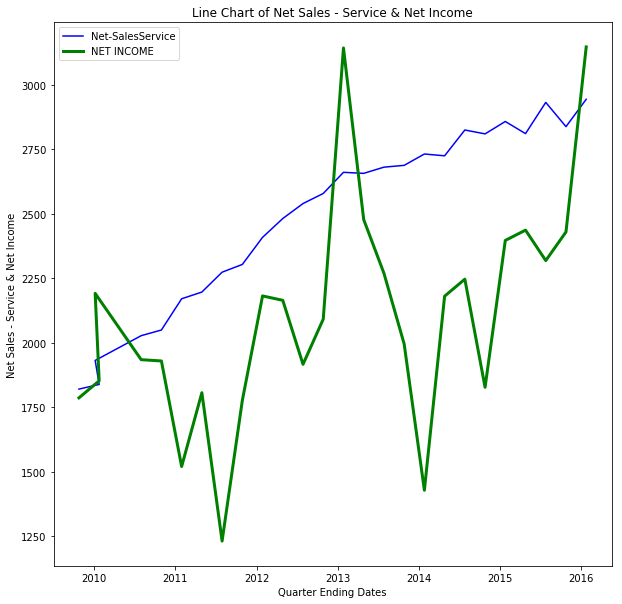

In [82]:
plt.figure(figsize=(10,10))
plt.plot(data['Date2'], data['Net-SalesService'], color='b')
plt.plot(data['Date2'], data['NET INCOME'], color='g', linewidth = 3)
plt.xlabel('Quarter Ending Dates')
plt.ylabel('Net Sales - Service & Net Income')
plt.title('Line Chart of Net Sales - Service & Net Income')
plt.legend()

Text(0.5,0,'Quarter Ending Dates')

Text(0.5,1,'Line Chart of Net Sales - Service, Product, Total')

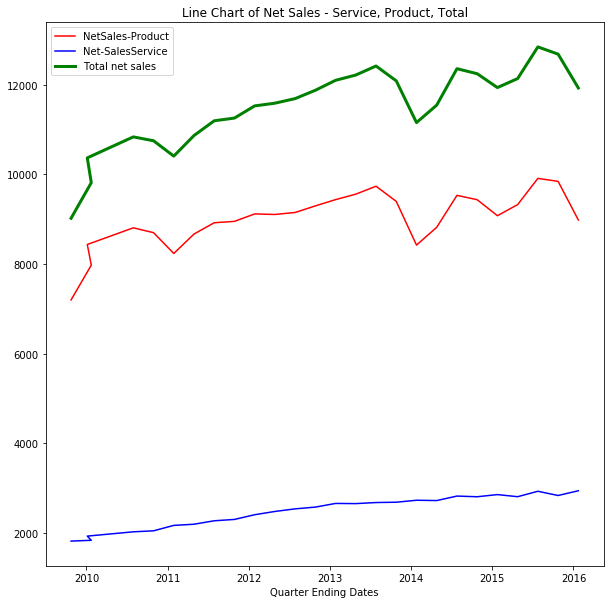

In [15]:
plt.figure(figsize=(10,10))
plt.plot(data['Date2'], data['NetSales-Product'], color='r')
plt.plot(data['Date2'], data['Net-SalesService'],color='b')
plt.plot(data['Date2'], data['Total net sales'], color='g', linewidth = 3)
plt.xlabel('Quarter Ending Dates')
plt.title('Line Chart of Net Sales - Service, Product, Total')
plt.legend()

(array([1., 1., 1., 0., 3., 6., 5., 5., 2., 2.]),
 array([2486. , 2669.7, 2853.4, 3037.1, 3220.8, 3404.5, 3588.2, 3771.9,
        3955.6, 4139.3, 4323. ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Histogram of CostofSales-Product')

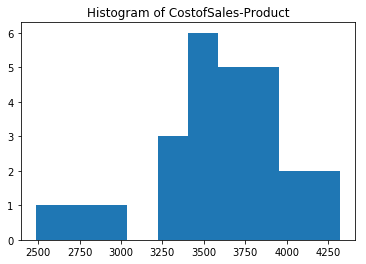

In [158]:
plt.hist(data['CostofSales-Product'])
plt.title('Histogram of CostofSales-Product')
plt.show()

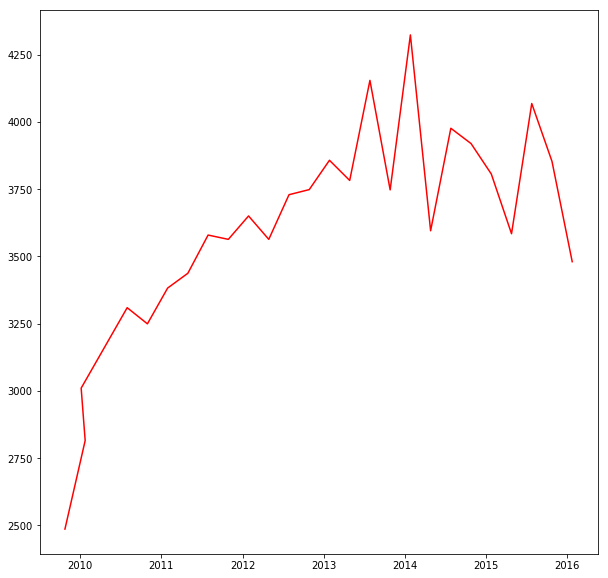

In [150]:
plt.figure(figsize=(10,10))
plt.plot(data['Date2'], data['CostofSales-Product'], color='r')

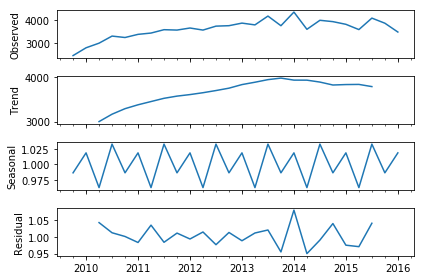

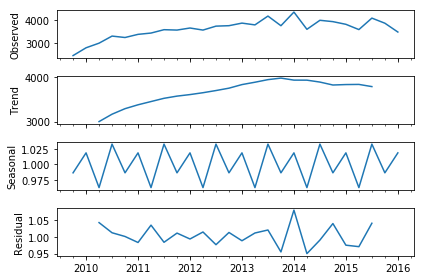

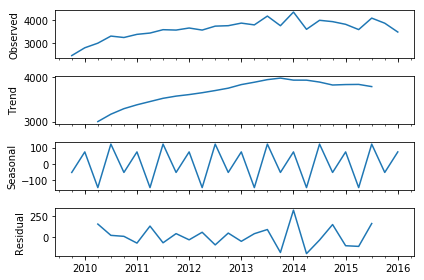

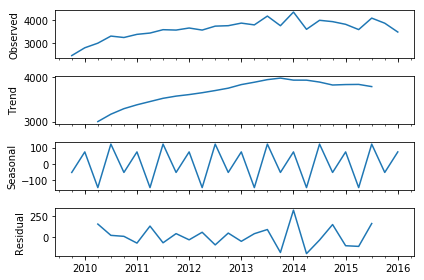

In [152]:
decomposition_CostSalesProduct1 = seasonal_decompose(data2['CostofSales-Product'], model = 'multiplicative')
decomposition_CostSalesProduct2 = seasonal_decompose(data2['CostofSales-Product'], model = 'additive')

decomposition_CostSalesProduct1.plot()
plt.show()

decomposition_CostSalesProduct2.plot()
plt.show()

(array([2., 0., 5., 2., 1., 3., 4., 2., 3., 4.]),
 array([ 647. ,  686.5,  726. ,  765.5,  805. ,  844.5,  884. ,  923.5,
         963. , 1002.5, 1042. ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Histogram of CostofSales-Service')

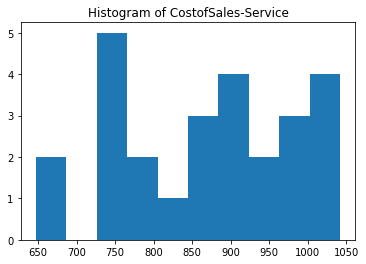

In [157]:
plt.hist(data['CostofSales-Service'])
plt.title('Histogram of CostofSales-Service')
plt.show()

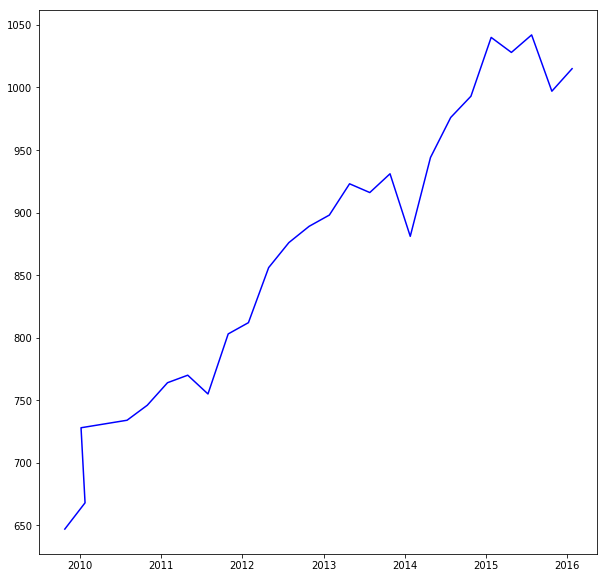

In [151]:
plt.figure(figsize=(10,10))
plt.plot(data['Date2'], data['CostofSales-Service'],color='b')

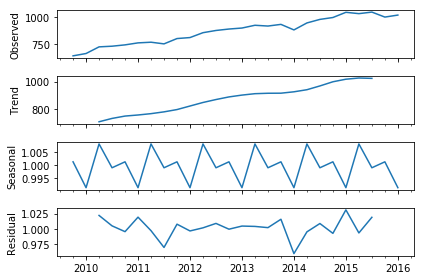

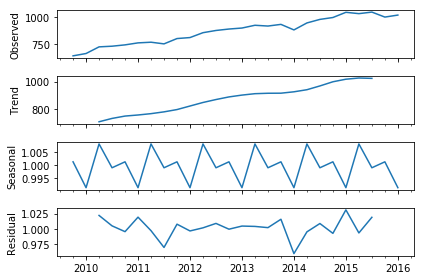

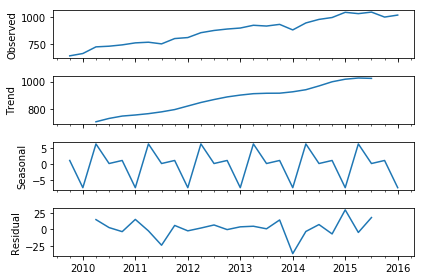

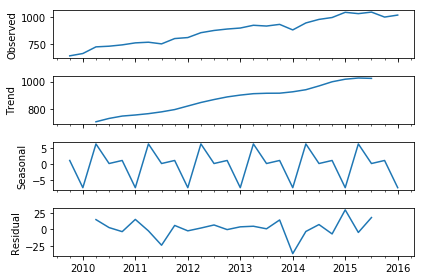

In [153]:
decomposition_CostSalesService1 = seasonal_decompose(data2['CostofSales-Service'], model = 'multiplicative')
decomposition_CostSalesService2 = seasonal_decompose(data2['CostofSales-Service'], model = 'additive')

decomposition_CostSalesService1.plot()
plt.show()

decomposition_CostSalesService2.plot()
plt.show()

Text(0.5,0,'Quarter Ending Dates')

Text(0.5,1,'Line Chart of Net Sales - Service, Product, Total')

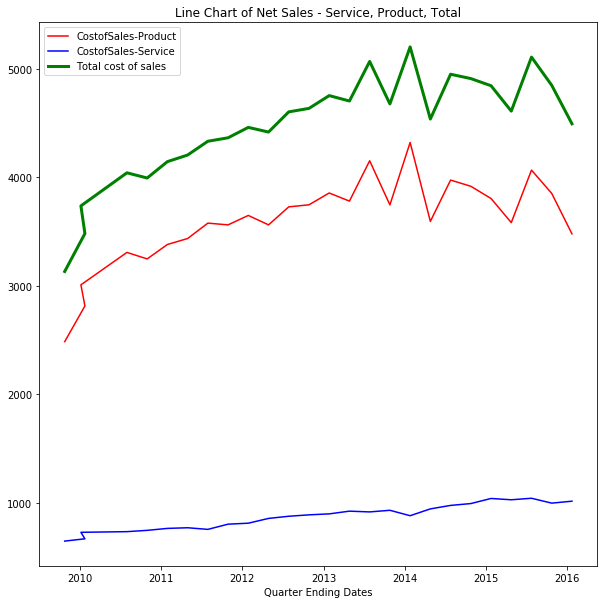

In [16]:
plt.figure(figsize=(10,10))
plt.plot(data['Date2'], data['CostofSales-Product'], color='r')
plt.plot(data['Date2'], data['CostofSales-Service'],color='b')
plt.plot(data['Date2'], data['Total cost of sales'], color='g', linewidth = 3)
plt.xlabel('Quarter Ending Dates')
plt.title('Line Chart of Net Sales - Service, Product, Total')
plt.legend()

(array([2., 1., 1., 2., 2., 3., 5., 6., 2., 2.]),
 array([5888. , 6082.4, 6276.8, 6471.2, 6665.6, 6860. , 7054.4, 7248.8,
        7443.2, 7637.6, 7832. ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Histogram of Gross Margin')

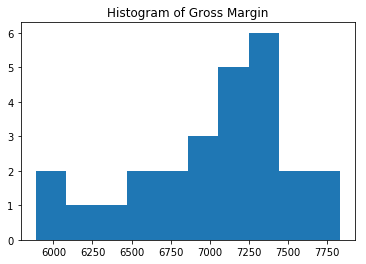

In [156]:
plt.hist(data['GROSS MARGIN'])
plt.title('Histogram of Gross Margin')
plt.show()

Text(0.5,0,'Quarter Ending Dates')

Text(0,0.5,'GROSS MARGIN')

Text(0.5,1,'Line Chart - GROSS MARGIN')

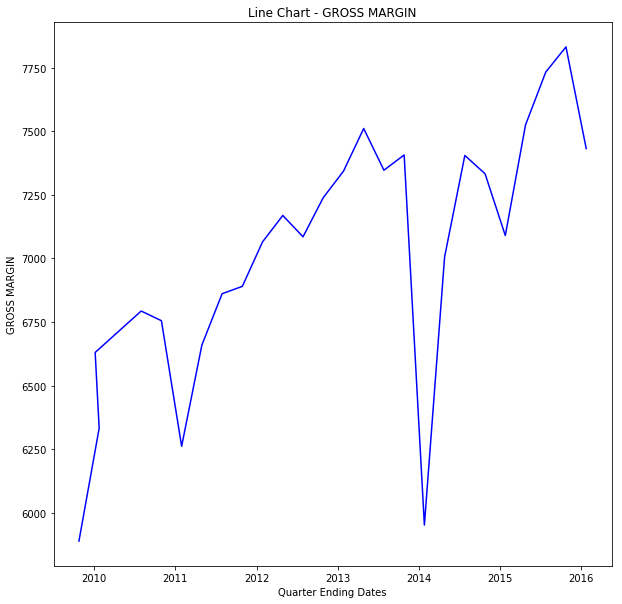

In [17]:
plt.figure(figsize=(10,10))
plt.plot(data['Date2'], data['GROSS MARGIN'], color='b')
plt.xlabel('Quarter Ending Dates')
plt.ylabel('GROSS MARGIN')
plt.title('Line Chart - GROSS MARGIN')

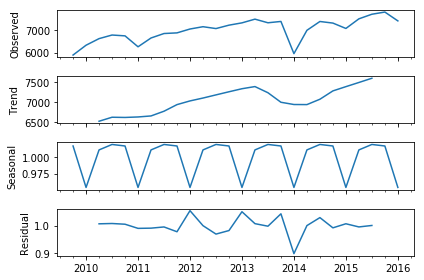

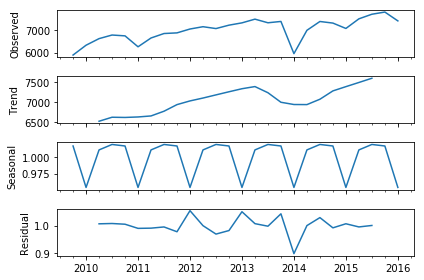

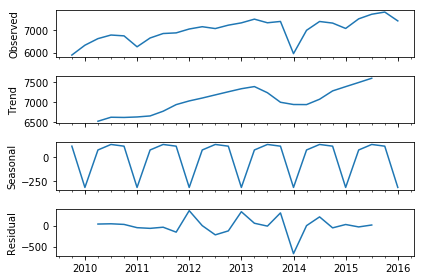

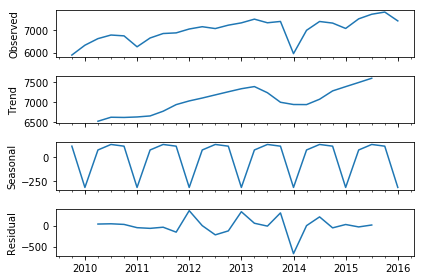

In [154]:
decomposition_GrossMargin1 = seasonal_decompose(data2['GROSS MARGIN'], model = 'multiplicative')
decomposition_GrossMargin2 = seasonal_decompose(data2['GROSS MARGIN'], model = 'additive')

decomposition_GrossMargin1.plot()
plt.show()

decomposition_GrossMargin2.plot()
plt.show()

Text(0.5,0,'Quarter Ending Dates')

Text(0.5,1,'Line Chart of All the Operating Expenses')

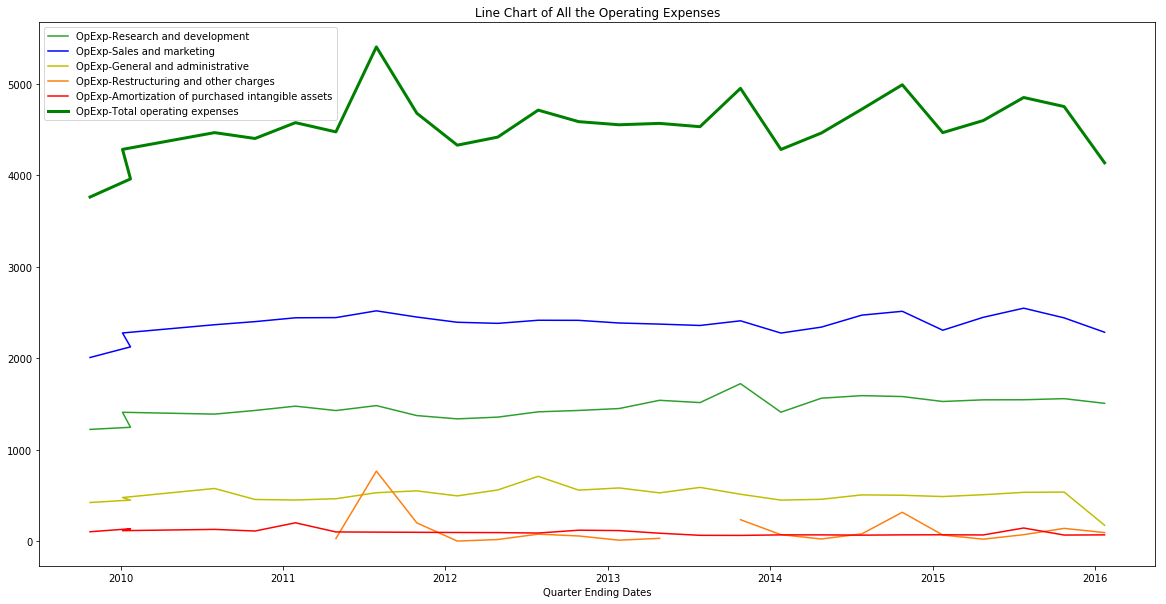

In [18]:
plt.figure(figsize=(20,10))
plt.plot(data['Date2'], data['OpExp-Research and development'], color='C2')
plt.plot(data['Date2'], data['OpExp-Sales and marketing'],color='b')
plt.plot(data['Date2'], data['OpExp-General and administrative'], color='y')
plt.plot(data['Date2'], data['OpExp-Restructuring and other charges'], color='C1')
plt.plot(data['Date2'], data['OpExp-Amortization of purchased intangible assets'], color='r')
plt.plot(data['Date2'], data['OpExp-Total operating expenses'], color='g', linewidth = 3)
plt.xlabel('Quarter Ending Dates')
plt.title('Line Chart of All the Operating Expenses')
plt.legend()


In [57]:
#Operating Expenses for Restructuring and Other charges is blank
#Since restructuring might not happen every quarter, so imputing 0 where missing
data = data.fillna({'OpExp-Restructuring and other charges':0})

In [58]:
pd.isnull(data).any()

NetSales-Product                                     False
Net-SalesService                                     False
Total net sales                                      False
CostofSales-Product                                  False
CostofSales-Service                                  False
Total cost of sales                                  False
GROSS MARGIN                                         False
OpExp-Research and development                       False
OpExp-Sales and marketing                            False
OpExp-General and administrative                     False
OpExp-Amortization of purchased intangible assets    False
OpExp-Restructuring and other charges                False
OpExp-Total operating expenses                       False
OPERATING INCOME                                     False
Interest income                                      False
Interest expense                                     False
Other income, net                                    Fal

Text(0.5,0,'Quarter Ending Dates')

Text(0.5,1,'Line Chart of All the Operating Expenses')

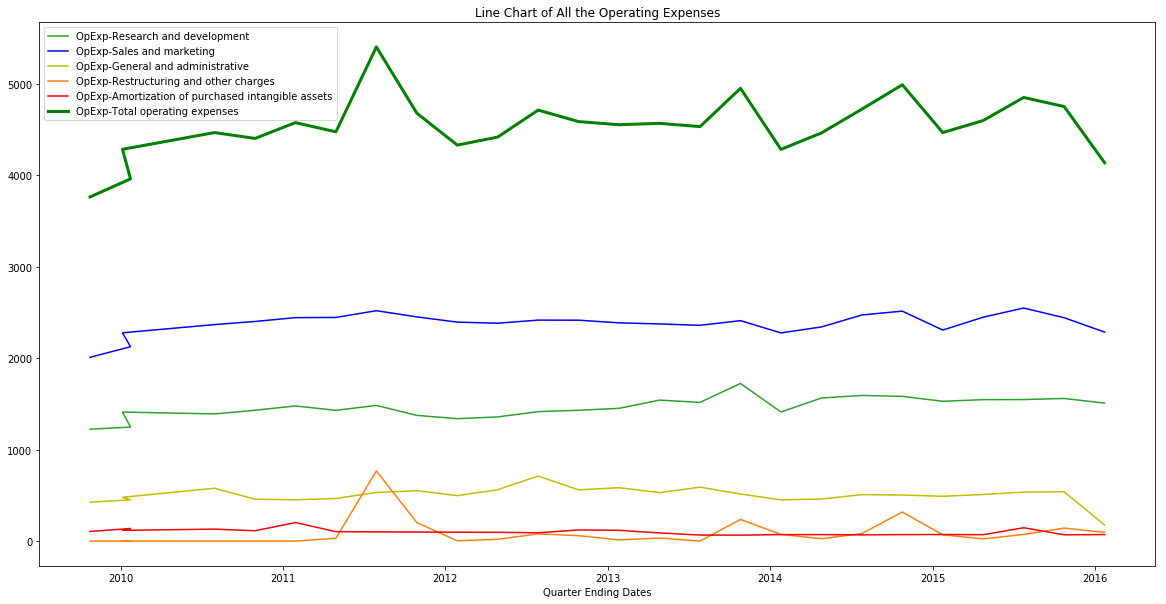

In [59]:
plt.figure(figsize=(20,10))
plt.plot(data['Date2'], data['OpExp-Research and development'], color='C2')
plt.plot(data['Date2'], data['OpExp-Sales and marketing'],color='b')
plt.plot(data['Date2'], data['OpExp-General and administrative'], color='y')
plt.plot(data['Date2'], data['OpExp-Restructuring and other charges'], color='C1')
plt.plot(data['Date2'], data['OpExp-Amortization of purchased intangible assets'], color='r')
plt.plot(data['Date2'], data['OpExp-Total operating expenses'], color='g', linewidth = 3)
plt.xlabel('Quarter Ending Dates')
plt.title('Line Chart of All the Operating Expenses')
plt.legend()

Text(0.5,0,'Quarter Ending Dates')

Text(0.5,1,'Line Chart - INCOME and Interest')

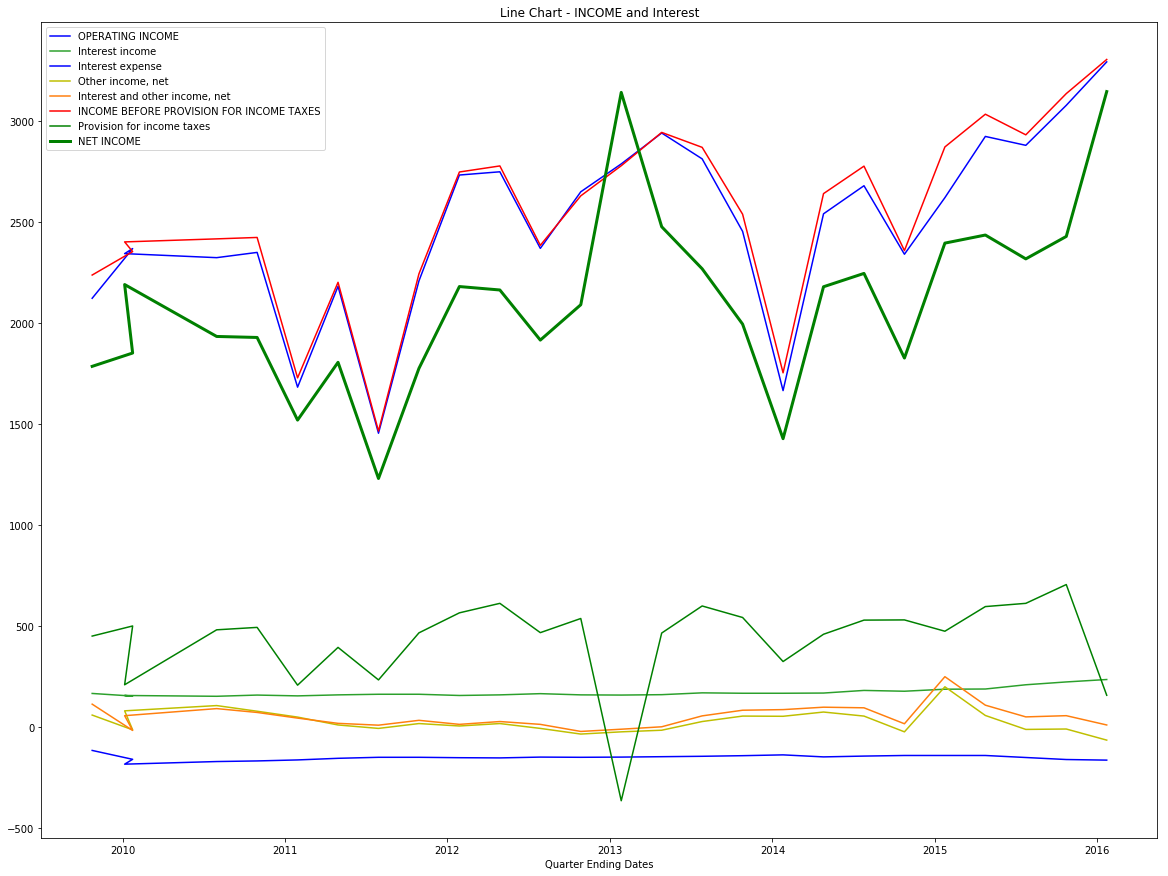

In [19]:
plt.figure(figsize=(20,15))
plt.plot(data['Date2'], data['OPERATING INCOME'], color='b')
plt.plot(data['Date2'], data['Interest income'], color='C2')
plt.plot(data['Date2'], data['Interest expense'],color='b')
plt.plot(data['Date2'], data['Other income, net '], color='y')
plt.plot(data['Date2'], data['Interest and other income, net'], color='C1')
plt.plot(data['Date2'], data['INCOME BEFORE PROVISION FOR INCOME TAXES'], color='r')
plt.plot(data['Date2'], data['Provision for income taxes'], color='g')
plt.plot(data['Date2'], data['NET INCOME'], color='g', linewidth = 3)
plt.xlabel('Quarter Ending Dates')
plt.title('Line Chart - INCOME and Interest')
plt.legend()

In [50]:
cor = data.corr()
cor

,NetSales-Product,Net-SalesService,Total net sales,CostofSales-Product,CostofSales-Service,Total cost of sales,GROSS MARGIN,OpExp-Research and development,OpExp-Sales and marketing,OpExp-General and administrative,...,OpExp-Restructuring and other charges,OpExp-Total operating expenses,OPERATING INCOME,Interest income,Interest expense,"Other income, net","Interest and other income, net",INCOME BEFORE PROVISION FOR INCOME TAXES,Provision for income taxes,NET INCOME
NetSales-Product,1.000000,0.772916,0.969326,0.789825,0.773860,0.824291,0.927657,0.697565,0.738092,0.388940,...,-0.071831,0.647790,0.592703,0.410741,-0.043831,-0.263690,-0.109410,0.575580,0.218952,0.468699
Net-SalesService,0.772916,1.000000,0.905156,0.828777,0.973845,0.903409,0.735261,0.731650,0.466575,0.005674,...,-0.283654,0.413523,0.544729,0.657175,0.292534,-0.167656,0.152995,0.561819,0.118324,0.503760
Total net sales,0.969326,0.905156,1.000000,0.850161,0.895658,0.902159,0.906275,0.750730,0.675202,0.262762,...,-0.173287,0.594156,0.608075,0.529729,0.083951,-0.241597,-0.014034,0.603223,0.192516,0.509131
CostofSales-Product,0.789825,0.828777,0.850161,1.000000,0.742549,0.987244,0.554665,0.622047,0.626364,0.313243,...,-0.088910,0.565316,0.220869,0.295918,0.191732,-0.139378,0.020893,0.222472,0.089565,0.178767
CostofSales-Service,0.773860,0.973845,0.895658,0.742549,1.000000,0.839718,0.780661,0.758116,0.459519,-0.007239,...,-0.303077,0.387439,0.617086,0.702742,0.227233,-0.073729,0.246000,0.645856,0.183707,0.555986
Total cost of sales,0.824291,0.903409,0.902159,0.987244,0.839718,1.000000,0.635255,0.684525,0.617046,0.252236,...,-0.177220,0.550418,0.325753,0.406959,0.209459,-0.130524,0.075415,0.333891,0.116282,0.277095
GROSS MARGIN,0.927657,0.735261,0.906275,0.554665,0.780661,0.635255,1.000000,0.673267,0.604173,0.223259,...,-0.104008,0.524365,0.769410,0.549588,-0.054939,-0.304622,-0.099015,0.752750,0.230712,0.639955
OpExp-Research and development,0.697565,0.731650,0.750730,0.622047,0.758116,0.684525,0.673267,1.000000,0.599321,0.023637,...,0.188567,0.656542,0.290342,0.438388,0.057210,0.048340,0.225265,0.318059,0.110454,0.264108
OpExp-Sales and marketing,0.738092,0.466575,0.675202,0.626364,0.459519,0.617046,0.604173,0.599321,1.000000,0.384316,...,0.458980,0.863858,0.054481,0.144607,-0.183172,-0.215050,-0.194711,0.029000,0.117991,-0.028262
OpExp-General and administrative,0.388940,0.005674,0.262762,0.313243,-0.007239,0.252236,0.223259,0.023637,0.384316,1.000000,...,0.039504,0.457769,-0.083801,-0.417015,0.101972,0.049415,-0.086562,-0.094590,0.201328,-0.192125


(<matplotlib.figure.Figure at 0x26333c17550>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26333c1e668>)

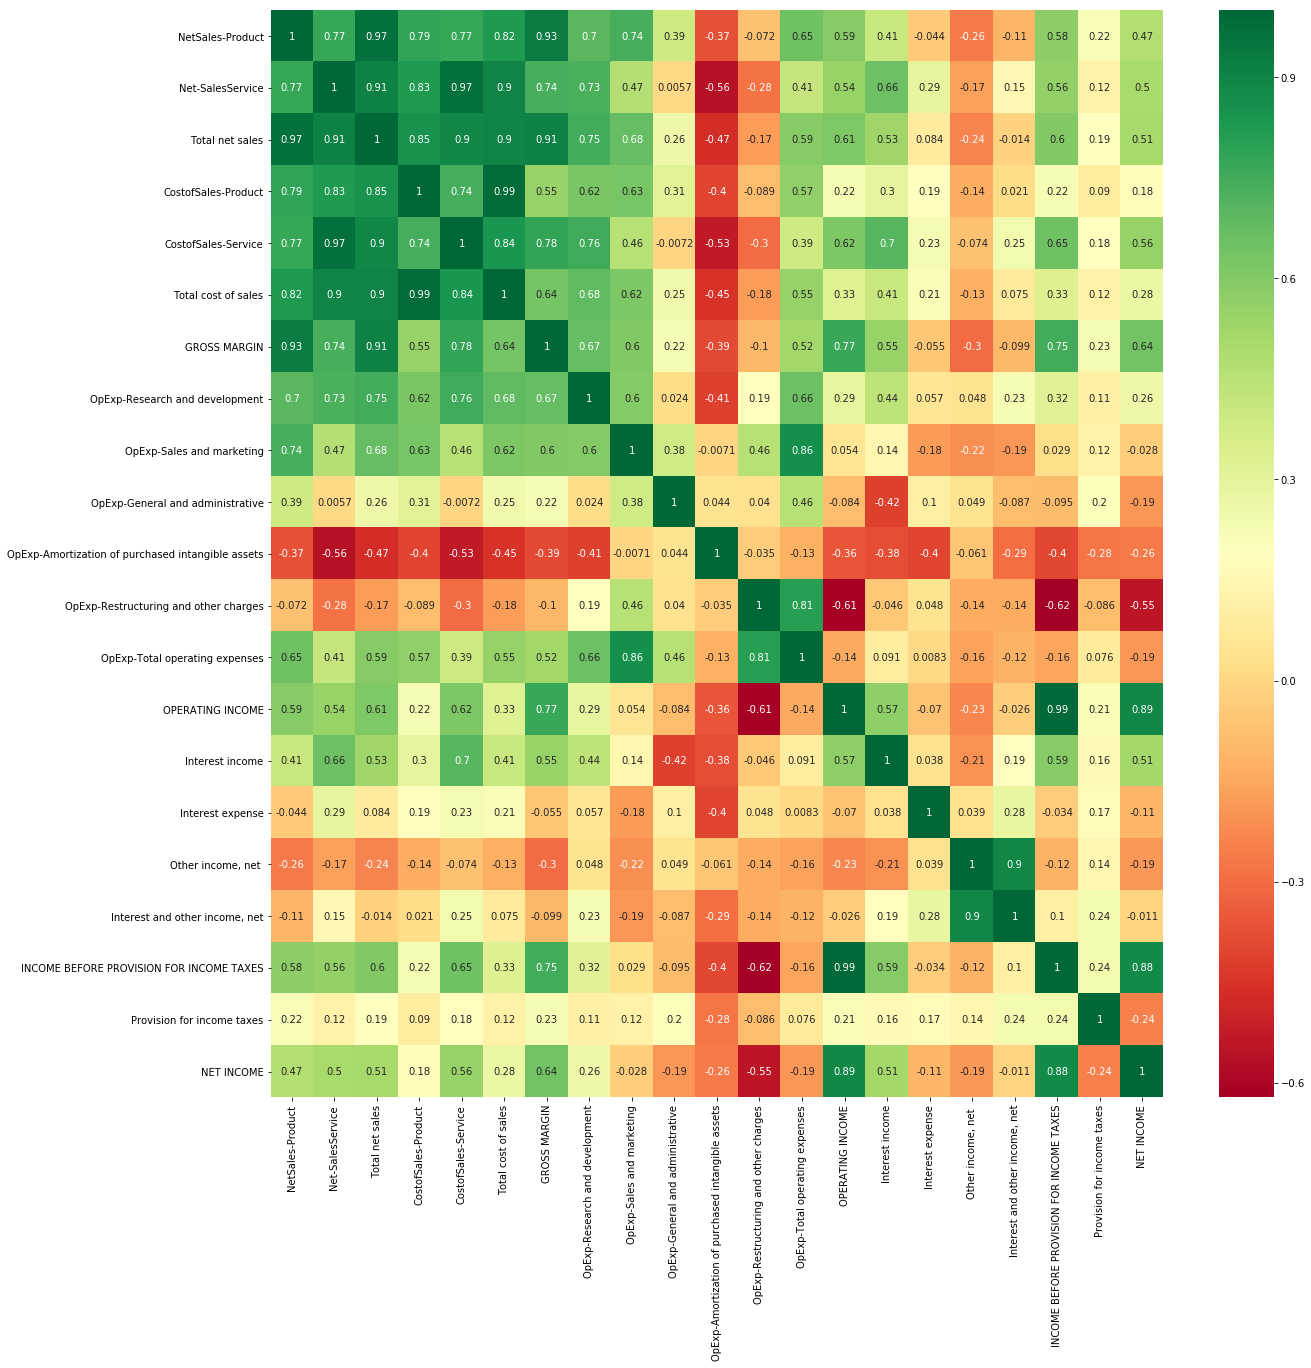

In [51]:
# HEATMAP FOR CORRELATION MATRIX
plt.subplots(figsize=(20,20))
sns.heatmap(cor, cmap="RdYlGn",annot=True)
plt.show()

In [67]:
#Create train and test with 80% and 20% split
train_data = data.iloc[0:21, :]
train_x = train_data.drop(['NET INCOME'], axis=1)
train_x = train_x.drop(['Date2'], axis=1)
train_y = train_data['NET INCOME']
test_data = data.iloc[21:27, :]
test_x = test_data.drop(['NET INCOME'], axis=1)
test_x = test_x.drop(['Date2'], axis=1)
test_y = test_data['NET INCOME']

In [68]:
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(21, 20)

(21,)

(5, 20)

(5,)

In [63]:
train_x.head()
train_x.tail()
train_y.head()

,NetSales-Product,Net-SalesService,Total net sales,CostofSales-Product,CostofSales-Service,Total cost of sales,GROSS MARGIN,OpExp-Research and development,OpExp-Sales and marketing,OpExp-General and administrative,OpExp-Amortization of purchased intangible assets,OpExp-Restructuring and other charges,OpExp-Total operating expenses,OPERATING INCOME,Interest income,Interest expense,"Other income, net","Interest and other income, net",INCOME BEFORE PROVISION FOR INCOME TAXES,Provision for income taxes
0,7200.0,1821.0,9021.0,2486.0,647.0,3133.0,5888.0,1224.0,2010.0,425.0,105.0,0.0,3764.0,2124.0,168.0,-114.0,61.0,115.0,2239.0,452.0
1,7976.0,1839.0,9815.0,2815.0,668.0,3483.0,6332.0,1247.0,2126.0,451.0,138.0,0.0,3962.0,2370.0,155.0,-158.0,-12.0,-15.0,2355.0,502.0
2,8436.0,1932.0,10368.0,3010.0,728.0,3738.0,6630.0,1411.0,2278.0,479.0,117.0,0.0,4285.0,2345.0,158.0,-182.0,82.0,58.0,2403.0,211.0
3,8808.0,2028.0,10836.0,3309.0,734.0,4043.0,6793.0,1391.0,2368.0,578.0,131.0,0.0,4468.0,2325.0,154.0,-169.0,108.0,93.0,2418.0,483.0
4,8700.0,2050.0,10750.0,3249.0,746.0,3995.0,6755.0,1431.0,2402.0,458.0,113.0,0.0,4404.0,2351.0,160.0,-166.0,80.0,74.0,2425.0,495.0


,NetSales-Product,Net-SalesService,Total net sales,CostofSales-Product,CostofSales-Service,Total cost of sales,GROSS MARGIN,OpExp-Research and development,OpExp-Sales and marketing,OpExp-General and administrative,OpExp-Amortization of purchased intangible assets,OpExp-Restructuring and other charges,OpExp-Total operating expenses,OPERATING INCOME,Interest income,Interest expense,"Other income, net","Interest and other income, net",INCOME BEFORE PROVISION FOR INCOME TAXES,Provision for income taxes
16,9397.0,2688.0,12085.0,3747.0,931.0,4678.0,7407.0,1724.0,2411.0,515.0,65.0,237.0,4952.0,2455.0,169.0,-140.0,56.0,85.0,2540.0,544.0
17,8423.0,2732.0,11155.0,4323.0,881.0,5204.0,5951.0,1412.0,2277.0,451.0,71.0,73.0,4284.0,1667.0,169.0,-136.0,55.0,88.0,1755.0,326.0
18,8820.0,2725.0,11545.0,3595.0,944.0,4539.0,7006.0,1565.0,2342.0,460.0,71.0,26.0,4464.0,2542.0,170.0,-146.0,76.0,100.0,2642.0,461.0
19,9532.0,2825.0,12357.0,3976.0,976.0,4952.0,7405.0,1593.0,2473.0,508.0,68.0,82.0,4724.0,2681.0,183.0,-142.0,56.0,97.0,2778.0,531.0
20,9435.0,2810.0,12245.0,3919.0,993.0,4912.0,7333.0,1583.0,2515.0,504.0,71.0,318.0,4991.0,2342.0,179.0,-139.0,-22.0,18.0,2360.0,532.0


0    1787.0
1    1853.0
2    2192.0
3    1935.0
4    1930.0
Name: NET INCOME, dtype: float64

In [64]:
test_x.head()
test_y.head()

,NetSales-Product,Net-SalesService,Total net sales,CostofSales-Product,CostofSales-Service,Total cost of sales,GROSS MARGIN,OpExp-Research and development,OpExp-Sales and marketing,OpExp-General and administrative,...,OpExp-Total operating expenses,OPERATING INCOME,Interest income,Interest expense,"Other income, net","Interest and other income, net",INCOME BEFORE PROVISION FOR INCOME TAXES,Provision for income taxes,NET INCOME,Date2
21,9078.0,2858.0,11936.0,3806.0,1040.0,4846.0,7090.0,1529.0,2308.0,490.0,...,4468.0,2622.0,189.0,-139.0,201.0,251.0,2873.0,476.0,2397.0,2015-01-24
22,9326.0,2811.0,12137.0,3584.0,1028.0,4612.0,7525.0,1547.0,2449.0,510.0,...,4600.0,2925.0,190.0,-139.0,59.0,110.0,3035.0,598.0,2437.0,2015-04-25
23,9911.0,2932.0,12843.0,4068.0,1042.0,5110.0,7733.0,1548.0,2549.0,536.0,...,4852.0,2881.0,211.0,-149.0,-10.0,52.0,2933.0,614.0,2319.0,2015-07-25
24,9844.0,2838.0,12682.0,3853.0,997.0,4850.0,7832.0,1560.0,2443.0,539.0,...,4753.0,3079.0,225.0,-159.0,-8.0,58.0,3137.0,707.0,2430.0,2015-10-24
25,8983.0,2944.0,11927.0,3480.0,1015.0,4495.0,7432.0,1509.0,2286.0,176.0,...,4138.0,3294.0,237.0,-162.0,-63.0,12.0,3306.0,159.0,3147.0,2016-01-23


21    2397.0
22    2437.0
23    2319.0
24    2430.0
25    3147.0
Name: NET INCOME, dtype: float64

In [52]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
lm.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
predict_test = lm.predict(test_x)
predict_test

array([2397., 2437., 2319., 2430., 3147.])

In [73]:
print("R Square value for test data")
np.round(lm.score(test_x,test_y)*100,0)
print("R Square value for train data")
np.round(lm.score(train_x,train_y)*100,0)

R Square value for test data


100.0

R Square value for train data


100.0

In [72]:
from sklearn import metrics
print("Mean Squared Error (MSE) for test data is")
np.round(metrics.mean_squared_error(test_y, predict_test),0)
from sklearn.metrics import mean_absolute_error
print("Mean absolute Error (MAE) for test data is")
np.round(mean_absolute_error(test_y, predict_test),0)

Mean Squared Error (MSE) for test data is


0.0

Mean absolute Error (MAE) for test data is


0.0

In [75]:
fdf = pd.concat([test_x, test_y],1)
fdf['Predicted']=np.round(predict_test,1)
fdf['Prediction_Error'] = fdf['NET INCOME']-fdf['Predicted']
fdf

,NetSales-Product,Net-SalesService,Total net sales,CostofSales-Product,CostofSales-Service,Total cost of sales,GROSS MARGIN,OpExp-Research and development,OpExp-Sales and marketing,OpExp-General and administrative,...,OPERATING INCOME,Interest income,Interest expense,"Other income, net","Interest and other income, net",INCOME BEFORE PROVISION FOR INCOME TAXES,Provision for income taxes,NET INCOME,Predicted,Prediction_Error
21,9078.0,2858.0,11936.0,3806.0,1040.0,4846.0,7090.0,1529.0,2308.0,490.0,...,2622.0,189.0,-139.0,201.0,251.0,2873.0,476.0,2397.0,2397.0,0.0
22,9326.0,2811.0,12137.0,3584.0,1028.0,4612.0,7525.0,1547.0,2449.0,510.0,...,2925.0,190.0,-139.0,59.0,110.0,3035.0,598.0,2437.0,2437.0,0.0
23,9911.0,2932.0,12843.0,4068.0,1042.0,5110.0,7733.0,1548.0,2549.0,536.0,...,2881.0,211.0,-149.0,-10.0,52.0,2933.0,614.0,2319.0,2319.0,0.0
24,9844.0,2838.0,12682.0,3853.0,997.0,4850.0,7832.0,1560.0,2443.0,539.0,...,3079.0,225.0,-159.0,-8.0,58.0,3137.0,707.0,2430.0,2430.0,0.0
25,8983.0,2944.0,11927.0,3480.0,1015.0,4495.0,7432.0,1509.0,2286.0,176.0,...,3294.0,237.0,-162.0,-63.0,12.0,3306.0,159.0,3147.0,3147.0,0.0


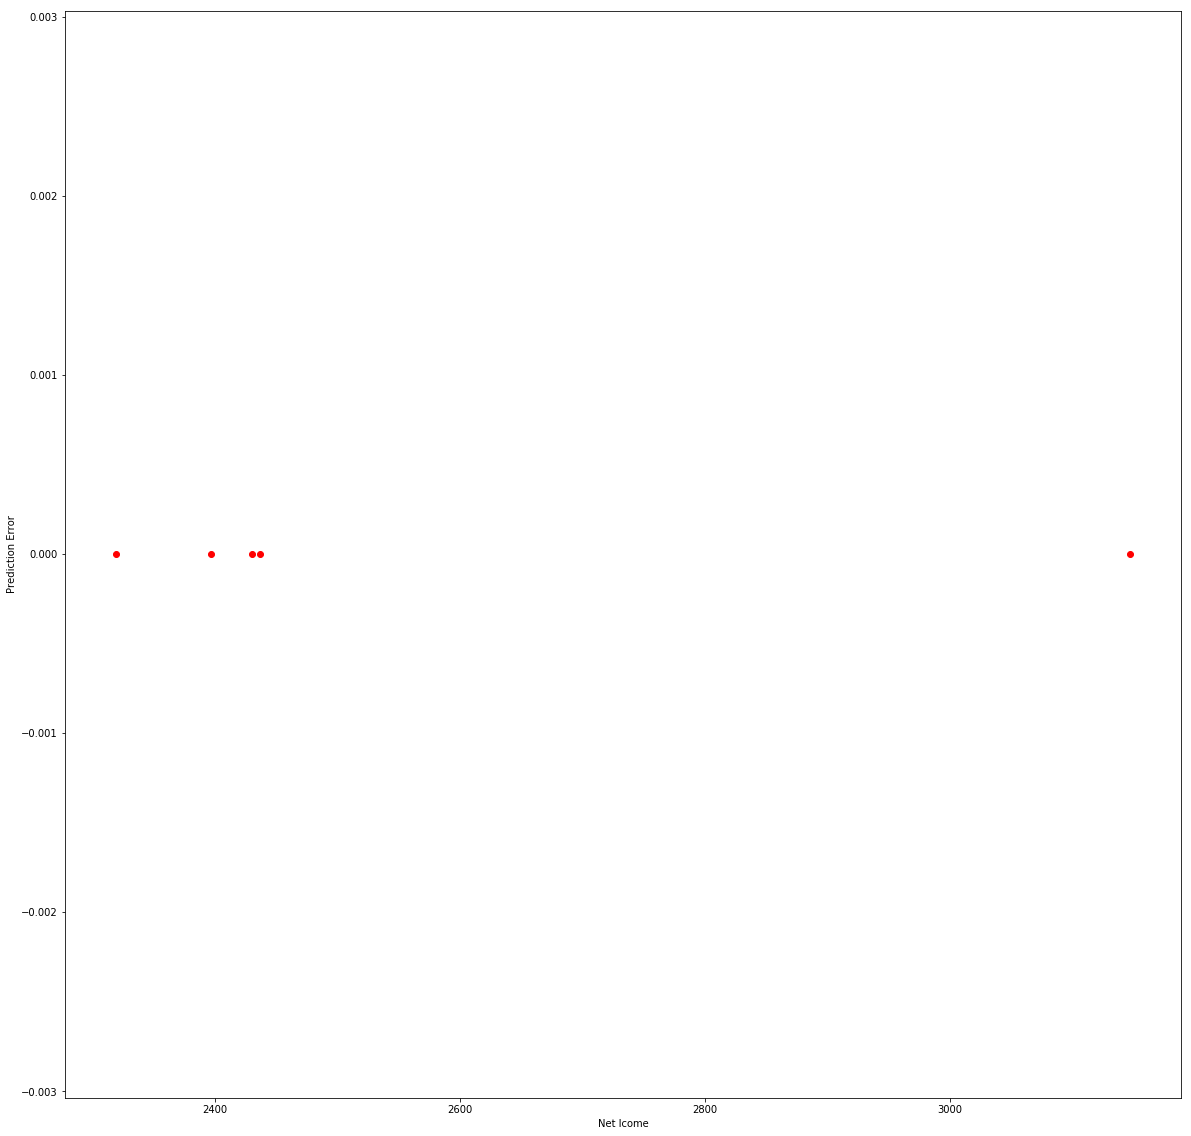

In [77]:
plt.subplots(figsize=(20,20))
plt.scatter(fdf['NET INCOME'], fdf.Prediction_Error, color='red')
plt.xlabel('Net Icome')
plt.ylabel('Prediction Error')
plt.show();